<a href="https://colab.research.google.com/github/elina007/-1/blob/master/LR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1. Подключение Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# 2. Чтение данных со страницы Википедии
url = "https://en.wikipedia.org/wiki/List_of_photovoltaics_companies"
id_table = 7 # номер таблицы подобран вручную
df = pd.read_html(url, header = 0, index_col = 0)[id_table]
df

# 3. Строка суммарной выработки не нужна для обработки данных
df_cleared = df.iloc[ : -1, :]
df_cleared = df_cleared.astype({'Shipment2009 in MW' : 'int', 'Shipment2010 in MW' : 'int'})
df_cleared



,Country,Shipment2009 in MW,Shipment2010 in MW
Solar cellcompany,,,
Suntech,China,704,1572
JA Solar,China,520,1464
First Solar,USA,1100,1411
Yingli Solar,China,525,1062
Trina Solar,China,399,1057
Motech Solar,Taiwan,360,924
Q-Cells,Germany,586,907
Gintech,Taiwan,368,827
Sharp,Japan,595,774


In [3]:
# 4. Сортровка данных
df_cleared = df_cleared.sort_values(['Shipment2009 in MW'], ascending = False)
print(df_cleared)

                   Country  Shipment2009 in MW  Shipment2010 in MW
Solar cellcompany                                                 
First Solar            USA                1100                1411
Suntech              China                 704                1572
Sharp                Japan                 595                 774
Q-Cells            Germany                 586                 907
Yingli Solar         China                 525                1062
JA Solar             China                 520                1464
Trina Solar          China                 399                1057
Gintech             Taiwan                 368                 827
Motech Solar        Taiwan                 360                 924
Sungen Solar         China                 193                 588


In [4]:
# 5. Добавление к таблице столбца с новыми данными, полученным путем преобразований имеющихся.
df_cleared_2 = df_cleared.copy()
df_cleared_2['Sh10 in KW'] = df_cleared_2['Shipment2010 in MW'] * 1000
print (df_cleared_2)

                   Country  Shipment2009 in MW  Shipment2010 in MW  Sh10 in KW
Solar cellcompany                                                             
First Solar            USA                1100                1411     1411000
Suntech              China                 704                1572     1572000
Sharp                Japan                 595                 774      774000
Q-Cells            Germany                 586                 907      907000
Yingli Solar         China                 525                1062     1062000
JA Solar             China                 520                1464     1464000
Trina Solar          China                 399                1057     1057000
Gintech             Taiwan                 368                 827      827000
Motech Solar        Taiwan                 360                 924      924000
Sungen Solar         China                 193                 588      588000


In [5]:
# 6. Выборка данных
print(df_cleared_2.Country)
print()

Solar cellcompany
First Solar         USA
Suntech           China
Sharp             Japan
Q-Cells         Germany
Yingli Solar      China
JA Solar          China
Trina Solar       China
Gintech          Taiwan
Motech Solar     Taiwan
Sungen Solar      China
Name: Country, dtype: object



In [6]:
# 7. Выборка данных по условию.
print(df_cleared[df_cleared.Country =='China'])
print()

                  Country  Shipment2009 in MW  Shipment2010 in MW
Solar cellcompany                                                
Suntech             China                 704                1572
Yingli Solar        China                 525                1062
JA Solar            China                 520                1464
Trina Solar         China                 399                1057
Sungen Solar        China                 193                 588



In [7]:
# 8. Статистические расчеты по сгруппированным данным.
# Суммарная мощность по типа электростанций.
print(df_cleared.groupby(['Country'])['Shipment2010 in MW'].sum())
print()

Country
China      5743
Germany     907
Japan       774
Taiwan     1751
USA        1411
Name: Shipment2010 in MW, dtype: int64



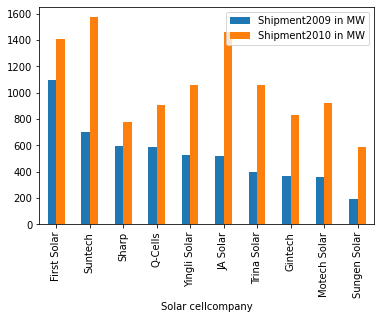

In [8]:
# 9. Быстрая визуализация данных.
# В предыдущей работе для визуализации данных применялись отдельные библиотеки.
# Но для быстрого получения графиков и гистограмм можно использовать очень простой код. 
df_cleared.plot(kind = 'bar')
print()


[5350 10586]
Index(['Shipment2009 in MW', 'Shipment2010 in MW'], dtype='object')


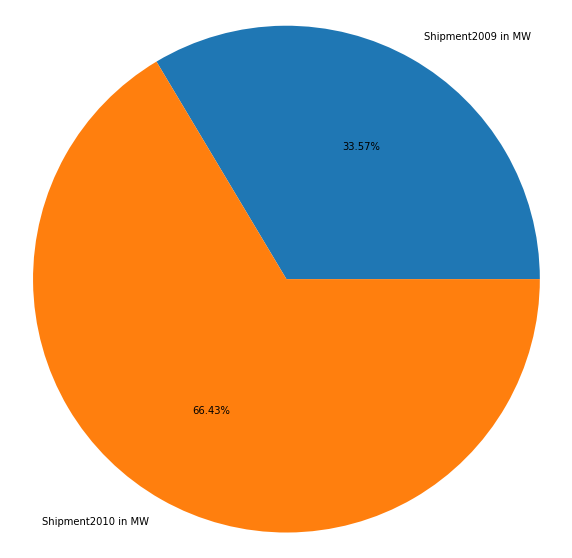

In [9]:
# 10. PieChart
mx_cleared = df_cleared.values
# получить сумму значений по столбцам, отвечающим за разные виды генерации (превые три столбца - это индекс, потребление, частота, а последний - обмен с другой системой).
generation_sum = mx_cleared[:,1:].sum(axis=0)
print (generation_sum)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_cleared.astype(str).columns[1:]
print (labels)
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(generation_sum, labels = labels, autopct = '%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [13]:
# 11. Создание интерактивного графика.
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
 
output_notebook()

types = ['2009','2010']
values = generation_sum
 
data=dict(types=types, values=values, color= ['yellow','green'], leg=['Shipment in 2009','Shipment in 2010'])
 
p = figure(x_range=types, y_range=(0, 8500), plot_height=250)
p.vbar(x='types', top='values', width=0.3, color='color',legend_field='leg', source=data)
 
p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
show(p)